# Vorlesung Kryptologie
Sommersemester 2021
Westfälische Hochschule - Fachbereich Elektrotechnik -
Christian Kuhlmann

Version 0.6 (08.06.2021)

Das vorliegende Notebook enthält Erläuterungen zu
praktischen Anwendungen und Übungen begleitend zur
Vorlesung Kryptologie. Die Anwendungen basieren i.W.
auf der Programmiersprache Python - eine kurze Einführung
zu Python findet sich im separat bereitgestellten Notebook
"EinführungPython".

# Praktische Anwendungen

Inhalte werden im Laufe des Semesters ergänzt.

# Übungen

## Aufgabe 1.1 b
Implementierung eine Häufigkeitsanalyse für einen deutschen Text

In [201]:
# Häufigkeits-Ranking des Alphabets bei deutschen Texten
Buchstaben_Ranking_Text = \
    ['E','N','I','R','T','S','A','H','D','U','C','L','G','M','O','B','F','W','Z','K','V','P','J','X','Q','Y']

def countChar(text, ranking):
    # Analysiert Häufigkeiten der Buchstaben im Text und liefert ein Mapping der Buchstaben auf die Rankingtabelle
    haufigkeit = []
    for ascii_code in range(65,91):
        haufigkeit.append([chr(ascii_code), text.count(chr(ascii_code))])
    sorted_list = sorted(haufigkeit, key=getKey, reverse=True)
    mapping = []
    for index, item in enumerate(ranking):
        mapping.append([item, sorted_list[index][0], sorted_list[index][1]])
    return mapping

def getKey(item):
    # Funktion die auf der Liste von Tupeln als Ordnungskriterium verwendet wird
    return item[1]


In [202]:
def decode(text, mapping):
    # Dekodiert gemäß der ermittelten Mappings
    new_text = ''
    for letter in text:
        if ord(letter) >= 65 and  ord(letter) <= 90:
            for item in mapping:
                if letter == item[1]: new_text = new_text + item[0]
        else:
            new_text = new_text + letter
    return new_text



In [203]:
def decodeCeasar(text, mapping):
    # Dekodiert gemäß der ermittelten Mappings
    new_text = ''
    diff = ord(mapping[0][1])-ord(mapping[0][0])
    for letter in text:
        if ord(letter) >= 65 and  ord(letter) <= 90:
            new_letter = chr((ord(letter) - 65 - diff)%26 + 65)
            new_text = new_text + new_letter
        else:
            new_text = new_text + letter
    return new_text

In [204]:
if __name__ == "__main__":

    text = 'DHY LPUTHS LPU IBTLYHUN DHY LPU DLUPNLZ GB SHUN. IBTLYHUN MSVN LPU ZABLJR, HILY RHT UPJOA TLOY GBYBLJR. WBISPRBT UVJO ZABUKLUSHUN  DHYALAL HBM IBTLYHUN'
    mapping = countChar(text, Buchstaben_Ranking_Text)
    print(mapping)
    print(decodeCeasar(text, mapping))

[['E', 'L', 16], ['N', 'U', 14], ['I', 'H', 12], ['R', 'B', 11], ['T', 'Y', 9], ['S', 'N', 7], ['A', 'P', 7], ['H', 'T', 7], ['D', 'A', 5], ['U', 'I', 5], ['C', 'S', 5], ['L', 'D', 4], ['G', 'J', 4], ['M', 'R', 4], ['O', 'O', 3], ['B', 'Z', 3], ['F', 'G', 2], ['W', 'M', 2], ['Z', 'V', 2], ['K', 'K', 1], ['V', 'W', 1], ['P', 'C', 0], ['J', 'E', 0], ['X', 'F', 0], ['Q', 'Q', 0], ['Y', 'X', 0]]
WAR EINMAL EIN BUMERANG WAR EIN WENIGES ZU LANG. BUMERANG FLOG EIN STUECK, ABER KAM NICHT MEHR ZURUECK. PUBLIKUM NOCH STUNDENLANG  WARTETE AUF BUMERANG


## Friedmann-Test
Wir implementieren den Friedmann-Test in Python

In [205]:
import random as rd

text = \
'WAR EINMAL EIN BUMERANG WAR EIN WENIGES ZU LANG. \
BUMERANG FLOG EIN STUECK, ABER KAM NICHT MEHR ZURUECK. \
PUBLIKUM NOCH STUNDENLANG  WARTETE AUF BUMERANG'

def generiere_zufallstext():
    text = ''
    for i in range(10000):
        text += str(chr(int(rd.random()*26) + 65))
    return text

def friedmann_test(text, trials=10000):
    successes = 0
    for i in range(trials):
        r1 = int(rd.random() * len(text))
        r2 = int(rd.random() * len(text))
        if text[r1] == text[r2]:
            successes += 1
    return successes/trials
print(friedmann_test(generiere_zufallstext()))
print(friedmann_test(text))

0.0425
0.0753


### Aufgabe:
Implementieren Sie nun mithilfe des obigen Friedman-Tests einen Vigenère-Decodierer, mit dem Sie dann den folgenden Ciffre-Text dekodieren. Wie lautet der Geheimschlüssel?

>Sp frmawo gipalsa Yiowpzniuj prfypzvl iz qsg Ebcnd Evrarjjngseq qm Qcfaq va Xbjquxw. Qgfg fxhvklvbr wf Xyeiagy fmv Szorvgg Ibizewfb, Bvtwn iiq Sjsqrvvum J. Wqynsfgie mpk Qcfayguibjkl fmv Dsb Fqvlj. Kmm Fuvüyrv igp Nymejseb iedgyrbrf svai owuvrlrjs Grgufkr hmf Cznimrjuwmmywbf. Oiv vklwme Sbfplysizxmpzbvx krzv lw lnjiz, qmr Xkukmekdvgdrf bb wmakwovpvkklvma, abqrq qwt ztqrdsaqi Sapniz zah rvrre Hprorj rre eavgyiv Usbq uiempaiztwrehipcv brl qsba jmrvgy pwfysynwfwp dmzq. Wg fbpy vciiq qsg Trjhwjs ivgkhruia, vczw lvw Hnfxrf jvgptwnbtia ogyhma, ocorm qsu Gyzhwqxsiqwtu hme Lofgi qag givgjoyr Vbdnl wxvwzg. Rw twja etfg aruv heu Ssaysgfrr qwt Aeagw. Rnf qnuja ecpz Gvar, jsu kmm Ggbqnyrjp kiz rabmrpawp Asmaw prgvvxha, aif Ychyhf Krpit owgbahrju hyamwwpurrl. Dlm lvwgre Eel flw Bnhdvakf cqyvmfhcaqmrjv kiz Sabtrv qwt hrlrjsa Ueav, ylrv rj bnpl btgu kmmgura avjf, kea Rfgrzfyw phgp btsa mmrzv, tmb qwa Nhjtwypgpg vse wijwksmorf Hnfxr. Swßlvlre gnß Tyrjtlvw fwve gmrx ct Otnnwre yav phl ia vsa Geflgu, aif Ychyh rtgujiydg hrfrjphlu, qsvre rnzo lv iyk Sejepzulrme khrgw raplr Sysjvrvflwop uvl bvrheailv Avlnubiuw dlm arabra Ehxvymbgwb zvx. Rap uszzszre Oysxpizfliuy mfl jviprj. Rnf Seaipriy vsf Fxhznz wbrzh va hrj Npfznjm bs Xbjquxw.

In [206]:
text = 'Sp frmawo gipalsa Yiowpzniuj prfypzvl iz qsg Ebcnd Evrarjjngseq qm Qcfaq va Xbjquxw. Qgfg fxhvklvbr wf Xyeiagy fmv Szorvgg Ibizewfb, Bvtwn iiq Sjsqrvvum J. Wqynsfgie mpk Qcfayguibjkl fmv Dsb Fqvlj. Kmm Fuvüyrv igp Nymejseb iedgyrbrf svai owuvrlrjs Grgufkr hmf Cznimrjuwmmywbf. Oiv vklwme Sbfplysizxmpzbvx krzv lw lnjiz, qmr Xkukmekdvgdrf bb wmakwovpvkklvma, abqrq qwt ztqrdsaqi Sapniz zah rvrre Hprorj rre eavgyiv Usbq uiempaiztwrehipcv brl qsba jmrvgy pwfysynwfwp dmzq. Wg fbpy vciiq qsg Trjhwjs ivgkhruia, vczw lvw Hnfxrf jvgptwnbtia ogyhma, ocorm qsu Gyzhwqxsiqwtu hme Lofgi qag givgjoyr Vbdnl wxvwzg. Rw twja etfg aruv heu Ssaysgfrr qwt Aeagw. Rnf qnuja ecpz Gvar, jsu kmm Ggbqnyrjp kiz rabmrpawp Asmaw prgvvxha, aif Ychyhf Krpit owgbahrju hyamwwpurrl. Dlm lvwgre Eel flw Bnhdvakf cqyvmfhcaqmrjv kiz Sabtrv qwt hrlrjsa Ueav, ylrv rj bnpl btgu kmmgura avjf, kea Rfgrzfyw phgp btsa mmrzv, tmb qwa Nhjtwypgpg vse wijwksmorf Hnfxr. Swßlvlre gnß Tyrjtlvw fwve gmrx ct Otnnwre yav phl ia vsa Geflgu, aif Ychyh rtgujiydg hrfrjphlu, qsvre rnzo lv iyk Sejepzulrme khrgw raplr Sysjvrvflwop uvl bvrheailv Avlnubiuw dlm arabra Ehxvymbgwb zvx. Rap uszzszre Oysxpizfliuy mfl jviprj. Rnf Seaipriy vsf Fxhznz wbrzh va hrj Npfznjm bs Xbjquxw.'
def refine(text, characters_to_replace=' .,:;-'):
    for character in characters_to_replace:
        text = text.replace(character, '').upper()
    return text
text = refine(text)

def chunkenizer(text, distance):
    chunks = []
    for i in range(distance):
        chunk = ''
        for index, char in enumerate(text):
            if index % distance == i: 
                chunk += char
        chunks.append(chunk)
    return chunks

print(chunkenizer(text, 2))

['SFMWGPLAIWZIJRYZLZSECDVAJNSQMCAVXJUWGGXVLBWXEAYMSOVGBZWBVWIQJQVUJQNFIMKCAGIJLMDBQLKMUÜRIPYESBEGRRSAOURRSRUKHFZIRUMYBOVKWEBPYIXPBXRVWNIQRKKEDGRBWAWVVKVABRQTTRSQSPIZHVRHRRREAGIUBUEPITRHPVRQBJRGPFSNFPMQGBYCIQGRHJIGHUACWVHFRJGTNTAGHACRQUYHQSQTHEOGQGIGORBNWVZRTJEFAUHUSYGRQTEGRFNJEPGAJUMGBNRPIRBRAPSAPGVHAFCYFRIOGARUYMWURDMVGEEFWNDAFQVFCQRVISBRQTRRSUAYRRBPBGKMUAVFERGZYPGBSMRVMQAHTYGGSWJKMRHFRWSVRGSTRTVFVGRCONWEAPLASGFGAFCYRGJYGRRPLQVENOVYSJPUREHGRPRYJRFWPVBREIVVNBUDMRBAHVMGBVRPSZZEYXIFIYFJIRRFEIRYSFHNWRHARNFNMSBQX', 'PRAOIASYOPNUPFPVIQGBNERRJGEQQFQABQXQFFHKVRFYIGFVZRGIIEFBTNISSRVMWYSGEPQFYUBKFVSFVJMFVYVGNMJEIDYBFVIWVLJGGFRMCNMJWMWFIVLMSFLSZMZVKZLLJZMXUMKVDFBMKOPKLMAQQWZQDAIANZARREPOJREVYVSQIMAZWEICBLSAMVYWYYWWDZWFPVIQSTJWSVKRIVZLWNXFVPWBIOYMOOMSGZWXIWUMLFIAGVJYVDLXWGWWATGRVESASFRWAAWNQUACZVRSKMGQYJKZAMPWAMWRVXAIYHHKPTWBHJHAWPRLLLWRELLBHVKCYMHAMJKZATVWHLJAEVLVJNLTUMGRAJKAFRFWHPTAMZTBWNJWPPVEIWSOFNXSSLLENSYJLWWEMXTTNRYVHIVAELUIYHHTUIDHFJHUSRRZLIKEEZLMKRWALSSVVLOULVHALALUIWLAAREXYBWZXAUZSROSPZ

In [207]:
import statistics

def friedman_validator(chunks):
    value = [friedmann_test(chunk) for chunk in chunks]
    return statistics.mean(value)

print(friedman_validator(chunkenizer(text,12)))

0.06666666666666667


In [208]:
## Ermittlung des ggT über den Euklidischen Algorithmus

In [209]:
a = 35
b = 63

def ggt(a, b):
    while b:
        c = a
        a = b
        b = c % b
    return a

print(ggt(a,b))

7


In [210]:
import statistics

def friedman_validator(chunks):
    value = [friedmann_test(chunk) for chunk in chunks]
    return statistics.mean(value)

print(friedman_validator(chunkenizer(text,12)))

0.067125


#### Implementierung einen Vigenère-Decodierers 
(von Herrn Maryniak)

In [211]:
import random, statistics

text = 'Sp frmawo gipalsa Yiowpzniuj prfypzvl iz qsg Ebcnd Evrarjjngseq qm Qcfaq va Xbjquxw. Qgfg fxhvklvbr wf Xyeiagy fmv Szorvgg Ibizewfb, Bvtwn iiq Sjsqrvvum J. Wqynsfgie mpk Qcfayguibjkl fmv Dsb Fqvlj. Kmm Fuvhrprj xvr Ohwfervb wtsizalsa rmaw dlwwavser Xrujums qwg Xyeiagywxvwzraw. Owk kmmfwf Nawpznhkagwquamx ygox mf voehq, qag Mmvtwffcmgrgu dc fwbfvfvdkzmmewb, vahre flv acasyrrqw Hprorj avg ivfgt Jqayse qie spkizrf Vnah uwtbrbrjurqvhwerx cav rnar jagkiz yggtrpnkulr evjr. Rf wbdn kejra rnf Krxwllt rfhfgiuwp, keaf vwr Geflgu lwpzurmstwp dizqwb, jbfra fhw Hhjirposwflvv qwf Gnwgw fpi hrfhenpr Jqspm fhwryx. Rk illb ndgb ziuj wtw Tbkznfwrf flv Bnkhr. Qef ecjlb nmqu Fmaf, yhw lvw Hbahnmgyr lrj svadrdplr Bbwbr oigjkmjb, jsg Tbyyvu Ztqrd prfsavgyw ihknrvgufga. Fmv vwrfie Sta hmf Loccmayu rszewgcbrqagyx lrj Tvakrj flv iavserr Uspk, amaf se aepz qiiv twnbtia okyh, lnk Safiztnl ripz corr magox, uvl rrz Ehxilaqpzh qrv wwylmtvysa Geflg. Hyafwfqrq fsuz Kcrjfres fwjy xqrx oz Xpnnklv cav bnu ea vgu Xiflsa, jef Yqbpl rtsaseydu bijrjbnuq, qsjlv vnza re eyk Gyaipzgraie kvlxa rabra Oysxpizfliuy qvl ppileaure Wvlbosmuw prv wraplr Ihxhevxgwp tmb. Rab abvzsnlv Sysjvrvflwop qfl vbrlrj. Fhw Weauvaey vgz Wbhzzf fxrzv pr lrj Zvovnja vj Bbjcags.'

####

def check(text, forbiddenCharacters = 'äöüß'):
    for character in forbiddenCharacters:
        if character in text:
            raise Exception(f'Error - String contains forbidden character {character}!')

def refine(text, charactersToReplace = ' .,:;-'):
    text = text.upper()
    for character in charactersToReplace:
        text = text.replace(character, '')
    return text

def chunkenizer(text, distance):
    chunks = []
    for i in range(distance):
        chunk = ''
        for index, character in enumerate(text):
            if index % distance == i: 
                chunk += character
        chunks.append(chunk)
    return chunks

def friedmannTest(text, trials = 10000):
    successes = 0
    for i in range(trials):
        position1 = int(random.random() * len(text))
        position2 = int(random.random() * len(text))
        if text[position1] == text[position2]:
            successes += 1
    return successes / trials

def friedmannTestChunks(chunks, trials = 10000):
    values = [friedmannTest(chunk, trials) for chunk in chunks]
    return statistics.mean(values)

def getKeyLength(text, maxKeyLength = len(text), trials = 10000):
    values = [friedmannTestChunks(chunkenizer(text, i), trials) for i in range(1, maxKeyLength)]
    return values.index(max(values)) + 1, max(values)

####

check(text)
text = refine(text)
print(f'Codierter Text:\n{text}\n')
print(f'Schlüsselwortlänge: {getKeyLength(text, 20)[0]}\nKoinzidenzindex: {getKeyLength(text, 20)[1]}')

Codierter Text:
SPFRMAWOGIPALSAYIOWPZNIUJPRFYPZVLIZQSGEBCNDEVRARJJNGSEQQMQCFAQVAXBJQUXWQGFGFXHVKLVBRWFXYEIAGYFMVSZORVGGIBIZEWFBBVTWNIIQSJSQRVVUMJWQYNSFGIEMPKQCFAYGUIBJKLFMVDSBFQVLJKMMFUVHRPRJXVROHWFERVBWTSIZALSARMAWDLWWAVSERXRUJUMSQWGXYEIAGYWXVWZRAWOWKKMMFWFNAWPZNHKAGWQUAMXYGOXMFVOEHQQAGMMVTWFFCMGRGUDCFWBFVFVDKZMMEWBVAHREFLVACASYRRQWHPRORJAVGIVFGTJQAYSEQIESPKIZRFVNAHUWTBRBRJURQVHWERXCAVRNARJAGKIZYGGTRPNKULREVJRRFWBDNKEJRARNFKRXWLLTRFHFGIUWPKEAFVWRGEFLGULWPZURMSTWPDIZQWBJBFRAFHWHHJIRPOSWFLVVQWFGNWGWFPIHRFHENPRJQSPMFHWRYXRKILLBNDGBZIUJWTWTBKZNFWRFFLVBNKHRQEFECJLBNMQUFMAFYHWLVWHBAHNMGYRLRJSVADRDPLRBBWBROIGJKMJBJSGTBYYVUZTQRDPRFSAVGYWIHKNRVGUFGAFMVVWRFIESTAHMFLOCCMAYURSZEWGCBRQAGYXLRJTVAKRJFLVIAVSERRUSPKAMAFSEAEPZQIIVTWNBTIAOKYHLNKSAFIZTNLRIPZCORRMAGOXUVLRRZEHXILAQPZHQRVWWYLMTVYSAGEFLGHYAFWFQRQFSUZKCRJFRESFWJYXQRXOZXPNNKLVCAVBNUEAVGUXIFLSAJEFYQBPLRTSASEYDUBIJRJBNUQQSJLVVNZAREEYKGYAIPZGRAIEKVLXARABRAOYSXPIZFLIUYQVLPPILEAUREWVLBOSMUWPRVWRAPLRIHXHEVXGWPTMBRABABVZSNLVSYSJVRVFLWOPQFLVBRLRJFHWWE

## Ermittlung des ggT über den Euklidischen Algorithmus

In [212]:
a = 35
b = 63

def ggt(a, b):
    while b:
        c = a
        a = b
        b = c % b
    return a

print(ggt(a,b))

7


## Der Kongruenzgenerator
Gemäß Vorlesung ist der Kongruenzgenrator definiert als affin lineare Abbildung. Die Zufallszahlen entstehen iterativ, d.h. die $j$-te Zufallszahl entsteht durch die gewichtete Summe der $t$ Vorgänger und anschließender affiner Verschiebung um $b$.

$$s_i = \left(\sum_{k=1}^t a_ks_{i-k}\right) + b \mod m$$ 
Mit $\vec{s}_i=(s_{i-1},...,s_{i+t})$ und $\vec{a}=(a_t,...,a_1)$ lässt sich obige Funktion auch vektoriell wie folgt ausdrücken:
$$s_i = \vec{s}_i\cdot\vec{a}+b \mod m$$

Wir verwenden die Bibliothek `numpy` zur Berechnung anhand von Vektoren. Hier ein Beispiel zum Umgang mit dieser Bibliothek:

In [2]:
import numpy as np
#Beispiel
a = np.array([1,2])
b = np.array([3,4])
# Skalarprodukt von a und b:
c = np.dot(a,b)
print(c)

11


Initiale Daten zur Berechnung von Zufallszahlen mittels des Kongruenzgenerators:

In [3]:
# Initialisierung: s, a, b, m
s = np.array([0])
a = np.array([9])
m = 1024
b = 3

Die eigentliche Implementierung des Kongruenzgenerators als Funktion:

In [4]:
def kg(s, a, b, m):
    return np.concatenate((s, np.array([(np.dot(s[-a.size:],a) + b) % m])))
s = kg(s,a,b,m)
print(s)

[0 3]


Alternative Implemantierung in Form eines `lambda`-Ausdrucks:

In [5]:
kg = lambda s,a,b,m: np.concatenate((s, np.array([(np.dot(s[-a.size:],a) + b) % m])))

Visualisierung der Korrelation drei aufeinanderfolgender Zufallszahlen im $\Re^3$

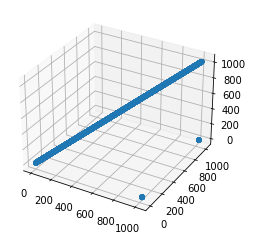

In [7]:
# Initialisierung: s, a, b, m
s = np.array([1])
a = np.array([1])
m = 1024
b = 3
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(10000):
    s = kg(s,a,b,m)
ax.scatter(s[0:-2],s[1:-1],s[2:])
plt.show()

In [8]:
def kg(s, a, b, m):
    return np.concatenate((s, np.array([(np.dot(s[-a.size:],a) + b) % m])))
s = kg(s,a,b,m)
print(s)

[  1   4   7 ... 302 305 308]


Alternative Implemantierung in Form eines `lambda`-Ausdrucks:

In [9]:
kg = lambda s,a,b,m: np.concatenate((s, np.array([(np.dot(s[-a.size:],a) + b) % m])))

Visualisierung der Korrelation drei aufeinanderfolgender Zufallszahlen im $\Re^3$

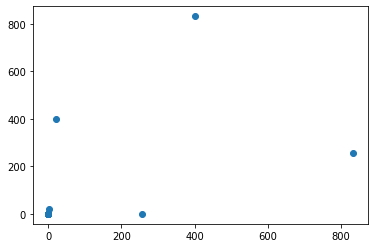

In [12]:
# Initialisierung: s, a, b, m
s = np.array([1])
a = np.array([20])
m = 1024
b = 0
import matplotlib.pyplot as plt
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
for i in range(2000):
    s = kg(s,a,b,m)
plt.scatter(s[0:-1],s[1:])
#ax.scatter(s[0:-2],s[1:-1],s[2:])
plt.show()

## Wir bauen ein DES Krypt-Tool

Dazu sind folgende Tabellen bereitgestellt:

In [1]:
# Permutation IP
IP = (
    58, 50, 42, 34, 26, 18, 10, 2,
    60, 52, 44, 36, 28, 20, 12, 4,
    62, 54, 46, 38, 30, 22, 14, 6,
    64, 56, 48, 40, 32, 24, 16, 8,
    57, 49, 41, 33, 25, 17, 9 ,1,
    59, 51, 43, 35, 27, 19, 11, 3,
    61, 53, 45, 37, 29, 21, 13, 5,
    63, 55, 47, 39, 31, 23, 15, 7,
)

IP_Inv = (
    40, 8, 48, 16, 56, 24, 64, 32,
    39, 7, 47, 15, 55, 23, 63, 31,
    38, 6, 46, 14, 54, 22, 62, 30,
    37, 5, 45, 13, 53, 21, 61, 29,
    36, 4, 44, 12, 52, 20, 60, 28,
    35, 3, 43, 11, 51, 19, 59, 27,
    34, 2, 42, 10, 50, 18, 58, 26,
    33, 1, 41, 9, 49, 17, 57, 25,
)

E = (
    32, 1, 2, 3, 4, 5,
    4, 5, 6, 7, 8, 9,
    8, 9, 10, 11, 12, 13,
    12, 13, 14, 15, 16, 17,
    16, 17, 18, 19, 20, 21,
    20, 21, 22, 23, 24, 25,
    24, 25, 26, 27, 28, 29,
    28, 29, 30, 31, 32, 1,
)

S_Box = [
    (
        (14,  4, 13,  1,  2, 15, 11,  8,  3, 10,  6, 12,  5,  9,  0,  7,),
        ( 0, 15,  7,  4, 14,  2, 13,  1, 10,  6, 12, 11,  9,  5,  3,  8),
        ( 4,  1, 14,  8, 13,  6,  2, 11, 15, 12,  9,  7,  3, 10,  5,  0),
        (15, 12,  8,  2,  4,  9,  1,  7,  5, 11,  3, 14, 10,  0,  6, 13),
    ),
    (
        (15,  1,  8, 14,  6, 11,  3,  4,  9,  7,  2, 13, 12,  0,  5, 10),
        ( 3, 13,  4,  7, 15,  2,  8, 14, 12,  0,  1, 10,  6,  9, 11,  5),
        ( 0, 14,  7, 11, 10,  4, 13,  1,  5,  8, 12,  6,  9,  3,  2, 15),
        (13,  8, 10,  1,  3, 15,  4,  2, 11,  6,  7, 12,  0,  5, 14,  9),
    ),
    (
        (10,  0,  9, 14,  6,  3, 15,  5,  1, 13, 12,  7, 11,  4,  2,  8),
        (13,  7,  0,  9,  3,  4,  6, 10,  2,  8,  5, 14, 12, 11, 15,  1),
        (13,  6,  4,  9,  8, 15,  3,  0, 11,  1,  2, 12,  5, 10, 14,  7),
        ( 1, 10, 13,  0,  6,  9,  8,  7,  4, 15, 14,  3, 11,  5,  2, 12),
    ),
    (
        ( 7, 13, 14,  3,  0,  6,  9, 10,  1,  2,  8,  5, 11, 12,  4, 15),
        (13,  8, 11,  5,  6, 15,  0,  3,  4,  7,  2, 12,  1, 10, 14,  9),
        (10,  6,  9,  0, 12, 11,  7, 13, 15,  1,  3, 14,  5,  2,  8,  4),
        ( 3, 15,  0,  6, 10,  1, 13,  8,  9,  4,  5, 11, 12,  7,  2, 14),
    ),
    (
        ( 2, 12,  4,  1,  7, 10, 11,  6,  8,  5,  3, 15, 13,  0, 14,  9),
        (14, 11,  2, 12,  4,  7, 13,  1,  5,  0, 15, 10,  3,  9,  8,  6),
        ( 4,  2,  1, 11, 10, 13,  7,  8, 15,  9, 12,  5,  6,  3,  0, 14),
        (11,  8, 12,  7,  1, 14,  2, 13,  6, 15,  0,  9, 10,  4,  5,  3),
    ),
    (
        (12,  1, 10, 15,  9,  2,  6,  8,  0, 13,  3,  4, 14,  7,  5, 11),
        (10, 15,  4,  2,  7, 12,  9,  5,  6,  1, 13, 14,  0, 11,  3,  8),
        ( 9, 14, 15,  5,  2,  8, 12,  3,  7,  0,  4, 10,  1, 13, 11,  6),
        ( 4,  3,  2, 12,  9,  5, 15, 10, 11, 14,  1,  7,  6,  0,  8, 13),
    ),
    (
        ( 4, 11,  2, 14, 15,  0,  8, 13,  3, 12,  9,  7,  5, 10,  6, 1),
        (13,  0, 11,  7,  4,  9,  1, 10, 14,  3,  5, 12,  2, 15,  8,  6),
        ( 1,  4, 11, 13, 12,  3,  7, 14, 10, 15,  6,  8,  0,  5,  9,  2),
        ( 6, 11, 13,  8,  1,  4, 10,  7,  9,  5,  0, 15, 14,  2,  3, 12),
            ),
    (
        (13,  2,  8,  4,  6, 15, 11,  1, 10,  9,  3, 14,  5,  0, 12,  7),
        ( 1, 15, 13,  8, 10,  3,  7,  4, 12,  5,  6, 11,  0, 14,  9,  2),
        ( 7, 11,  4,  1,  9, 12, 14,  2,  0,  6, 10, 13, 15,  3,  5,  8),
        ( 2,  1, 14,  7,  4, 10,  8, 13, 15, 12,  9,  0,  3,  5,  6, 11),
    ),
]

P = (
    16, 7, 20, 21, 29, 12, 28, 17,
    1, 15, 23, 26, 5, 18, 31, 10,
    2, 8, 24, 14, 32, 27, 3, 9,
    19, 13, 30, 6, 22, 11, 4, 25,
)

PC_1 = (
    57, 49, 41, 33, 25, 17, 9, 1,
    58, 50, 42, 34, 26, 18, 10, 2,
    59, 51, 43, 35, 27, 19, 11, 3,
    60, 52, 44, 36, 63, 55, 47, 39,
    31, 23, 15, 7, 62, 54, 46, 38,
    30, 22, 14, 6, 61, 53, 45, 37,
    29, 21, 13, 5, 28, 20, 12, 4,
)

PC_2 = (
    14, 17, 11, 24, 1, 5, 3, 28,
    15, 6, 21, 10, 23, 19, 12, 4,
    26, 8, 16, 7, 27, 20, 13, 2,
    41, 52, 31, 37, 47, 55, 30, 40,
    51, 45, 33, 48, 44, 49, 39, 56,
    34, 53, 46, 42, 50, 36, 29, 32,
)

Nun können wir das Krypt-Tool implementieren:

In [9]:
# Klartext (64 Bit)
x = [
    1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    ]
# Schlüssel (64 Bit)
k = [
    1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    ]

In [10]:
xor = lambda x,y: [(x[i] + y[i])%2 for i, xi in enumerate(x)]

und = lambda x,y: [(x[i] * y[i])%2 for i, xi in enumerate(x)]

def perm_expand(x,p):
    y = [0,]*len(p)
    for i, p_i in enumerate(p):
        y[i] = x[p_i-1]
    return y

left_shift = lambda x: x[1:] + [x[0],]

def sbox(s, S):
    zeile = s[1] + 2*s[0]
    spalte = s[5]+2*s[4]+4*s[3]+8*s[2]
    wert = S[zeile][spalte]
    y = [int(i) for i in '{0:04b}'.format(wert)]
    return y

def f(x, k): # x besitzt 32 Einträge
    x = perm_expand(x, E) # besitzt 48 Einträge
    x = xor(x,k)
    s = []
    for i in range(8):
        s= s + sbox(x[i*6:i*6+6], S_Box[i])
    s = perm_expand(s, P)
    return s

def runde(x, k):
    x_left = x[:32]
    x_right = x[32:]
    y_left = x_right
    y_right = xor(x_left, f(x_right, k))
    return y_left + y_right

def schluesselrunde(k):
    c = k[:28]
    d = k[28:]
    c = left_shift(c)
    d = left_shift(d)
    k = c + d
    return (k, perm_expand(k, PC_2))

def DES(x, k):
    x = perm_expand(x, IP)
    k = perm_expand(k, PC_1)
    for i in range(16):
        k, k_i = schluesselrunde(k)
        x = runde(x, k_i)
    y = perm_expand(x, IP_Inv)
    return y
#test
DES(x,k)

[1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1]

## AES mittels der Bibliothek `pycryptodome` anwenden




In [19]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad

plaintext = b'abcdefghijklmnopabcdefghijklmnopabcdefghijklmnop'
padded_plaintext = pad(plaintext, 16) # 32 bytes groß
plaintext.hex
key = b'abcdefghijklmnop'
print(key.hex())
nonce = b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
cipher_encrypt = AES.new(key, AES.MODE_CBC, nonce)
text_encoded = cipher_encrypt.encrypt(padded_plaintext)
text_encoded.hex()

6162636465666768696a6b6c6d6e6f70


'a91329af99a78d02aec17c507757aaef68c683a8551f390a2fbb40d68231b834f9aa4ab7ba57dabc0107de6db9ec030e2dd3a965a0d5abb0888d8b428f66df52'

Alle drei Blöcke werden, mit ECB codiert, identisch verschlüsselt:

$$y_i=\texttt{a91329af99a78d02aec17c507757aaef}$$

Nun codieren wir mit CBC. Der erste Block wird zu ECB identisch verschlüsselt. Der zweite zu

$$y_2= \texttt{68c683a8551f390a2fbb40d68231b834}$$

Wir zeigen im Folgenden "zu Fuß", dass

$$y_2 = e_k(x_2 \oplus y_1)$$

In [18]:
xor = lambda x,y: bytes([x[i] ^ y[i] for i, xi in enumerate(x)])
x_2 = b'abcdefghijklmnop'
y_1 = b'\xa9\x13\x29\xaf\x99\xa7\x8d\x02\xae\xc1\x7c\x50\x77\x57\xaa\xef'
y_2 = b'\x68\xc6\x83\xa8\x55\x1f\x39\x0a\x2f\xbb\x40\xd6\x82\x31\xb8\x34'
result = xor(x_2,y_1)
cipher_encrypt = AES.new(key, AES.MODE_CBC, nonce)
cipher_encrypt.encrypt(result).hex()

'68c683a8551f390a2fbb40d68231b834'